In [47]:
import pandas as pd

In [48]:
datos = pd.read_csv('BBDD-T2-15.csv')

In [49]:
datos.tail()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
180855,30-jun-2015,P - Barbie,Móviles,Jun. 2015,Martes,Comunidad de Madrid,3.000,1,"0,08 €","33,33 %","1,67","0,08 €","26,67 €","0,08 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180856,30-jun-2015,P - Toy Story,Móviles,Jun. 2015,Martes,Comunidad Valenciana,19.000,2,"0,11 €","10,53 %","1,68","0,06 €","5,79 €","0,06 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180857,30-jun-2015,P - Toy Story,Tablets,Jun. 2015,Martes,Castilla-La Mancha,6.000,2,"0,47 €","33,33 %","2,00","0,24 €","78,33 €","0,24 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180858,30-jun-2015,M - Playmobil,Tablets,Jun. 2015,Martes,Castilla-La Mancha,27.000,0,"0,00 €","0,00 %","1,70","0,00 €","0,00 €","0,00 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180859,30-jun-2015,Shopping - General,Tablets,Jun. 2015,Martes,Comunidad Valenciana,1.144,20,"3,76 €","1,75 %","0,00","0,19 €","3,29 €","0,19 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"


In [50]:
def mod(a):
   return float(str(a).split('\xc2\xa0\xe2\x82\xac')[0].replace(',','.'))

datos['Coste'] = datos['Coste'].apply(mod)
datos['CPC medio'] = datos['CPC medio'].apply(mod)
datos['Coste medio'] = datos['Coste medio'].apply(mod)

In [51]:
def mod2(c):
   return float(str(c).replace(',','.'))
datos['Conversiones'] = datos['Conversiones'].apply(mod2)

In [52]:
def my_fun(b):
    if float((str(b).split('.')[1])) == 0.000 :
        return float(str(b).split('.')[0])+float(str(b).split('.')[1])
    else:
        return float(str(b).replace('.',''))
datos['Impresiones'] = datos['Impresiones'].apply(my_fun)

In [53]:
datos.describe()

,Impresiones,Clics,Coste,CPC medio,Coste medio,Conversiones
count,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000
mean,50.555966,1.479166,0.313807,0.043111,0.043111,0.019756
std,302.402541,9.452198,2.280932,0.113709,0.113709,0.269034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,1.000000,0.020000,0.020000,0.020000,0.000000
max,17959.000000,496.000000,123.330000,8.220000,8.220000,44.000000


In [54]:
datdia = datos.groupby(['Día']).sum()

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

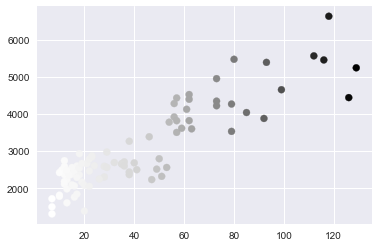

In [56]:
plt.scatter(datdia["Conversiones"], datdia["Clics"], c=datdia["Conversiones"])

In [57]:
datdia[(datdia.Conversiones>100)]

,Impresiones,Clics,Coste,CPC medio,Coste medio,Conversiones
Día,,,,,,
08-jun-2015,202568.0,6641,1754.91,93.95,93.95,118.0
09-jun-2015,177753.0,5461,1392.44,88.41,88.41,116.0
22-jun-2015,142787.0,5571,1407.63,77.34,77.34,112.0
29-jun-2015,154355.0,5249,981.80,59.58,59.58,129.0
30-jun-2015,120330.0,4445,793.83,57.51,57.51,126.0


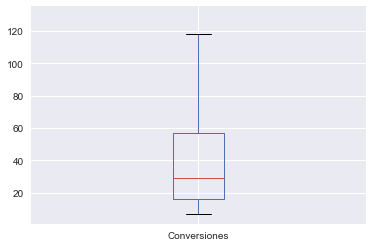

In [58]:
datdia.boxplot('Conversiones')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000259C2DD8>]], dtype=object)

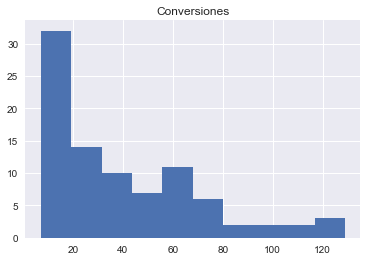

In [59]:
datdia.hist('Conversiones')

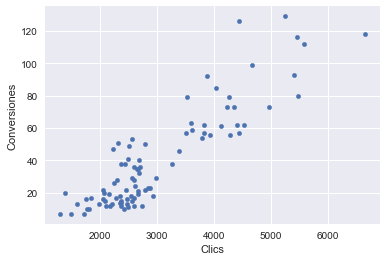

In [60]:
datdia.plot.scatter(x='Clics', y='Conversiones');

In [61]:
dispoo = datos.groupby('Dispositivo').sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A0654A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000024936C18>]], dtype=object)

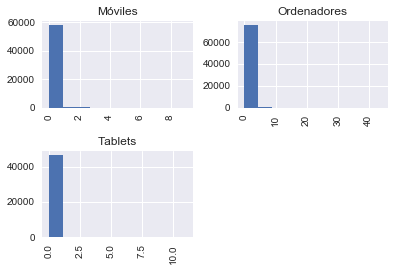

In [62]:
datos.hist('Conversiones',by='Dispositivo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002513A9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000025A7FB00>]], dtype=object)

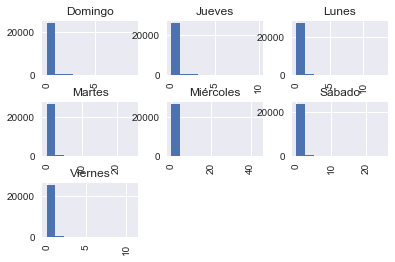

In [63]:
datos.hist('Conversiones',by='Día de la semana')

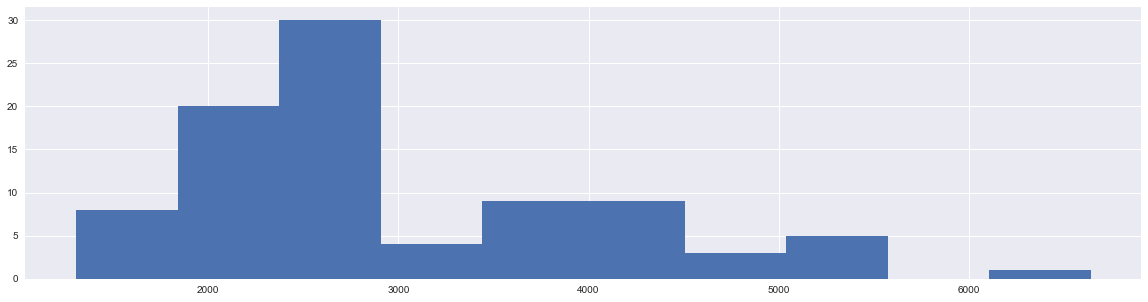

In [64]:
plt.figure(figsize=(20,5)) 
plt.hist(datdia["Clics"])
plt.show()

In [65]:
import seaborn as sns

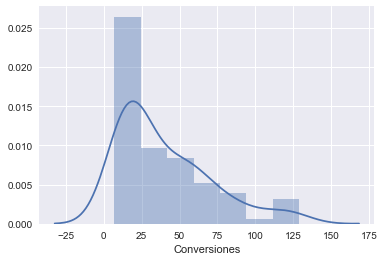

In [66]:
sns.distplot(datdia["Conversiones"])

(array([ 32.,  14.,  10.,   7.,  11.,   6.,   2.,   2.,   2.,   3.]),
 array([   7. ,   19.2,   31.4,   43.6,   55.8,   68. ,   80.2,   92.4,
         104.6,  116.8,  129. ]),
 <a list of 10 Patch objects>)

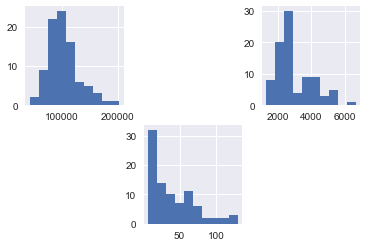

In [67]:
plt.subplot(2,3,1)
plt.hist(datdia["Impresiones"])

plt.subplot(2,3,3)
plt.hist(datdia["Clics"])

plt.subplot(2,3,5)
plt.hist(datdia["Conversiones"])

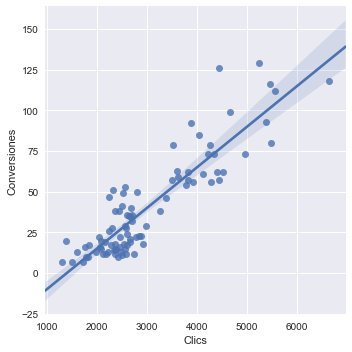

In [68]:
sns.lmplot(data=datdia, x="Clics",y="Conversiones" )

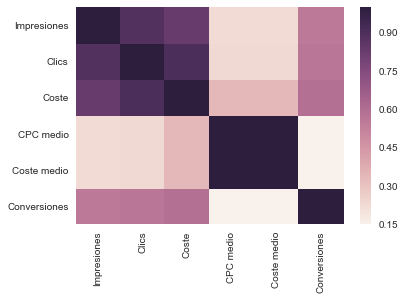

In [70]:
sns.heatmap(datos.corr())

C:\Users\Angel\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



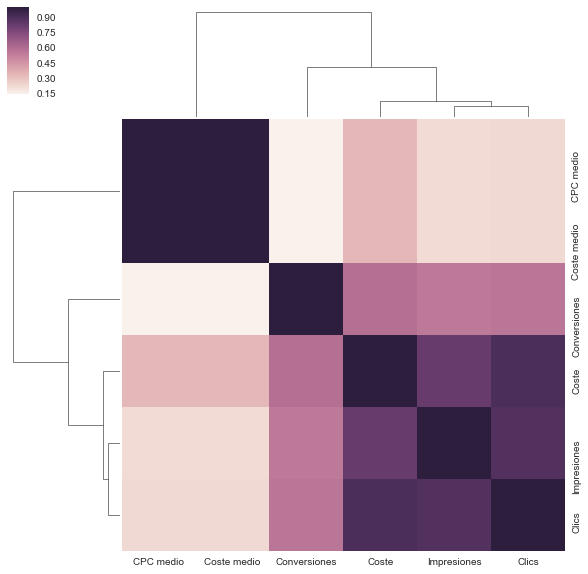

In [71]:
sns.clustermap(datos.corr())

In [72]:
# ranking conversiones por día de la semana
tops = datos.groupby('Día de la semana').mean()['Conversiones'].sort_values(ascending=False)

In [73]:
tops.head(10)

Día de la semana
Lunes        0.025097
Martes       0.024808
Domingo      0.021367
Miércoles    0.018518
Sábado       0.017029
Viernes      0.015861
Jueves       0.015032
Name: Conversiones, dtype: float64

In [ ]:
f